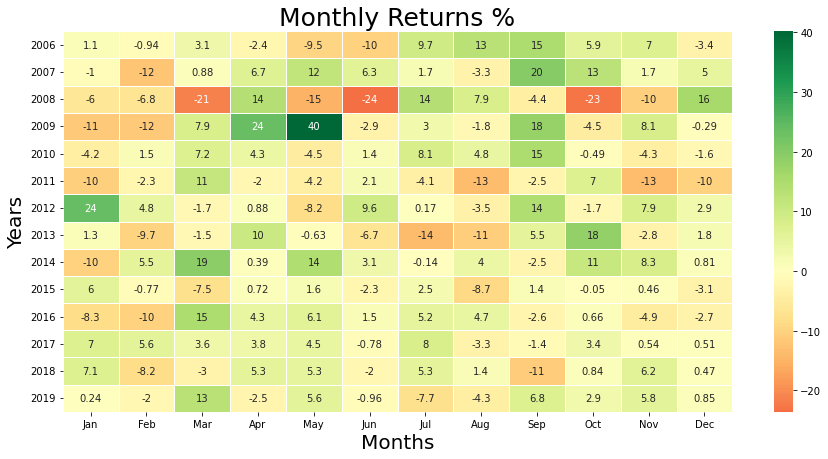

In [1]:
import pandas as pd #1.3.5
import numpy as np #1.22.0
import seaborn as sns #0.11.2
import matplotlib.pyplot as plt #3.5.1

month_dict = {'01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', 
              '05': 'May','06': 'Jun', '07': 'Jul', '08': 'Aug', 
              '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}

# Loaded csv file in dataframe
nifty = pd.read_csv('banknifty-data.csv')
# Split datetime column
nifty_date = nifty["datetime"].str.split('-', expand=True)

# Column data type conversion and month no. replaced with corresponding names
nifty['date_year'] = nifty_date[0].astype(np.uint16)
nifty['date_month'] = nifty_date[1].apply(lambda x: month_dict[x])
nifty['date_date'] = nifty_date[2].astype(np.uint8)
nifty['date_index'] = nifty['date_date']
nifty = nifty.set_index('date_index')

# Dropped irrelevant columns
nifty = nifty.drop(['datetime','high','low','volume'], axis=1)

# Create Month and Year List for iteration
year_list = nifty.date_year.unique().tolist()
month_list = nifty.date_month.unique().tolist()
#print(f"{year_list} \n {month_list}")

# Created a new df to store records
nifty_return = pd.DataFrame(columns=['Year', 'Month', 'Month_Open', 'Month_Close'])

for year in year_list:
    nifty_year_filter = nifty[nifty['date_year'] == year]
    #print(nifty_year_filter)
    for month in month_list:
        nifty_year_month_filter = nifty_year_filter[nifty_year_filter['date_month'] == month]
        #print(nifty_year_month_filter)
        opening_date = nifty_year_month_filter.date_date.min()
        closing_date = nifty_year_month_filter.date_date.max()
        #print(f"Opening Date: {opening_date} & Closing Date: {closing_date} in {month}, {year}")
        opening_price = nifty_year_month_filter.at[opening_date,'open']
        closing_price = nifty_year_month_filter.at[closing_date,'close']
        #print(f"Opening and Closing Price are {opening_price}, {closing_price} repectively in the month of {month}, {year}")
        # Append records in nifty_return
        nifty_return.loc[len(nifty_return)] = [year, month, opening_price, closing_price]

# Calculating Returns 
nifty_return['return'] = round(((nifty_return['Month_Close'] - nifty_return['Month_Open'])/
                                nifty_return['Month_Open'])*100,2)

nifty_return = nifty_return.drop(['Month_Open','Month_Close'], axis=1)

nifty_return = pd.pivot_table(nifty_return, values = 'return', index=['Year'], columns = 'Month').reset_index()
nifty_return = nifty_return.set_index('Year')
# Rearranging Month Columns
nifty_return = nifty_return[month_list]
#print(nifty_return)

sns.heatmap(nifty_return, cmap='RdYlGn', linewidths=0.5, annot=True,center=0, cbar = True)
plt.title('Monthly Returns %', fontsize = 25)
plt.xlabel('Months', fontsize = 20)
plt.ylabel('Years', fontsize = 20)
plt.gcf().set_size_inches(15, 7)